<a href="https://colab.research.google.com/github/shreyamali01/CS203_Lab04/blob/main/CS203_Lab04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Assignment 4**
<br>
Team 01 Submission
<br>
<br>
Team Member 1 <br>
Shreya Mali <br>
22110135
<br>
<br>
Team Member 2 <br>
Vaibhav Lawange<br>
23310055 <br>

###**Task 1 : Setup the Dataset**

Installing Required Libraries

In [ ]:
#datasets for loading MNIST from Hugging Face
#numpy for array manipulation
#sklearn for data splitting
!pip install -q datasets numpy scikit-learn

Loading the MNIST Dataset

In [ ]:
from datasets import load_dataset
import numpy as np

#loading MNIST dataset
mnist = load_dataset("mnist")

#extracting the images and labels
train_data = mnist["train"]
test_data = mnist["test"]

#converting images to numpy arrays
X_train = np.array(train_data["image"])
y_train = np.array(train_data["label"])
X_test = np.array(test_data["image"])
y_test = np.array(test_data["label"])

#printing shapes to verify
print("training set shape:", X_train.shape, y_train.shape)
print("testing set shape:", X_test.shape, y_test.shape)

training set shape: (60000, 28, 28) (60000,)
testing set shape: (10000, 28, 28) (10000,)


Normalizing the Image Data

In [ ]:
#normalizing pixel values in the range [0,1]
X_train = X_train.astype("float32") / 255
X_test = X_test.astype("float32") / 255

Flattening Each Image into a vector of 784 Features


In [ ]:
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

print("flattened training set shape:", X_train.shape)
print("flattened testing set shape:", X_test.shape)

flattened training set shape: (60000, 784)
flattened testing set shape: (10000, 784)


Dataset into Training and Testing Set

In [ ]:
print("final training set shape:", X_train.shape, y_train.shape)
print("final testing set shape:", X_test.shape, y_test.shape)

final training set shape: (60000, 784) (60000,)
final testing set shape: (10000, 784) (10000,)


Randomly selecting an initially labeled dataset of 200 samples from training samples


In [ ]:
#selecting a random seed for reproducibility
np.random.seed(42)

#randomly selecting 200 indices from the training set
labeled_indices = np.random.choice(len(X_train), size=200, replace=False)

#creating the labeled dataset with 200 samples
X_labeled = X_train[labeled_indices]
y_labeled = y_train[labeled_indices]

#removing the selected 200 samples from the training set to form the unlabeled pool
X_unlabeled = np.delete(X_train, labeled_indices, axis=0)
y_unlabeled = np.delete(y_train, labeled_indices, axis=0)

#checking the shapes of the labeled and unlabeled datasets
print("labeled dataset shape:", X_labeled.shape)
print("unlabeled pool shape:", X_unlabeled.shape)

labeled dataset shape: (200, 784)
unlabeled pool shape: (59800, 784)


Creating 3 copies of X_labeled, y_labeled, X_unlabeled, and y_unlabeled for Task 2, Task 3 and Task 4

In [ ]:
#copy1
X_labeled1 = X_labeled.copy()
y_labeled1 = y_labeled.copy()
X_unlabeled1 = X_unlabeled.copy()
y_unlabeled1 = y_unlabeled.copy()

#copy2
X_labeled2 = X_labeled.copy()
y_labeled2 = y_labeled.copy()
X_unlabeled2 = X_unlabeled.copy()
y_unlabeled2 = y_unlabeled.copy()

#copy3
X_labeled3 = X_labeled.copy()
y_labeled3 = y_labeled.copy()
X_unlabeled3 = X_unlabeled.copy()
y_unlabeled3 = y_unlabeled.copy()

###**Task 2 : Implement Random Sampling for Active Learning**

Training a Random Forest Classifier on the initial dataset of 200 samples

In [ ]:
#importing required libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

#initializing Random Forest Classifier
rf_classifier1 = RandomForestClassifier(random_state=42)

#training the classifier on the initial labeled dataset
rf_classifier1.fit(X_labeled1, y_labeled1)

RandomForestClassifier(random_state=42)

Implementing Active Learning loop for 20 iterations

In [ ]:
#empty list for stories the accuracy values
random_sampling_accuracies = []

for iteration in range(20):
  #randomly selecting a sample from the unlabeled pool
  idx = np.random.choice(len(X_unlabeled1))

  #getting the selected sample and its true label
  X_selected1 = X_unlabeled1[idx]
  y_selected1 = y_unlabeled1[idx]

  #adding the selected sample and its label to the labeled dataset
  X_labeled1 = np.vstack([X_labeled1, X_selected1])  #adding new sample to labeled dataset
  y_labeled1 = np.append(y_labeled1, y_selected1)    #adding its label to labeled dataset

  #removing the selected sample from the unlabeled dataset
  X_unlabeled1 = np.delete(X_unlabeled1, idx, axis=0)
  y_unlabeled1 = np.delete(y_unlabeled1, idx, axis=0)

  #retraining the model with the updated labeled dataset
  rf_classifier1.fit(X_labeled1, y_labeled1)

  #predict on the test set
  y_pred1 = rf_classifier1.predict(X_test)

  #claculating accuracy on the test set
  accuracy1 = accuracy_score(y_test, y_pred1)
  random_sampling_accuracies.append(accuracy1)

  #printing accuracy on each iteration
  print(f"Iteration {iteration + 1}: Accuracy = {accuracy1:.4f}")

Iteration 1: Accuracy = 0.8112
Iteration 2: Accuracy = 0.8081
Iteration 3: Accuracy = 0.8035
Iteration 4: Accuracy = 0.8142
Iteration 5: Accuracy = 0.8102
Iteration 6: Accuracy = 0.8098
Iteration 7: Accuracy = 0.8102
Iteration 8: Accuracy = 0.8153
Iteration 9: Accuracy = 0.8112
Iteration 10: Accuracy = 0.8062
Iteration 11: Accuracy = 0.8104
Iteration 12: Accuracy = 0.8058
Iteration 13: Accuracy = 0.8080
Iteration 14: Accuracy = 0.8050
Iteration 15: Accuracy = 0.8093
Iteration 16: Accuracy = 0.8082
Iteration 17: Accuracy = 0.8112
Iteration 18: Accuracy = 0.8087
Iteration 19: Accuracy = 0.8118
Iteration 20: Accuracy = 0.8106


###**Task 3 : Implement Uncertainty Sampling for Active Learning**

Training a Random Forest Classifier on the initial dataset of 200 samples

In [ ]:
#importing required libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

#initializing Random Forest Classifier
rf_classifier2 = RandomForestClassifier(random_state=42)

#training the classifier on the initial labeled dataset
rf_classifier2.fit(X_labeled2, y_labeled2)

RandomForestClassifier(random_state=42)

Function to compute uncertainty

In [ ]:
#function to calculate entropy
def entropy(probs):
    entropy_value = -np.sum(probs * np.log(probs + 1e-9), axis=1)   #avoiding log0 by adding a small value
    return entropy_value

#computing uncertainty using entropy
def compute_uncertainty(X_unlabeled, model):
    probs = model.predict_proba(X_unlabeled)                        #getting probability predictions
    uncertainties = entropy(probs)                                #computing entropy for each sample
    return uncertainties

Implementing Active Learning loop for 20 iterations

In [ ]:
#empty list for stories the accuracy values
uncertainty_sampling_accuracies = []

for iteration in range(20):

  #computing uncertainty for each sample in the unlabeled pool
  uncertainties = compute_uncertainty(X_unlabeled2, rf_classifier2)

  #selecting the sample with the highest uncertainty
  max_uncertainty_idx = np.argmax(uncertainties)

  #getting the selected sample and its true label
  X_selected2 = X_unlabeled2[max_uncertainty_idx]
  y_selected2 = y_unlabeled2[max_uncertainty_idx]

  #adding the selected sample and its label to the labeled dataset
  X_labeled2 = np.vstack([X_labeled2, X_selected2])  #adding new sample to labeled dataset
  y_labeled2 = np.append(y_labeled2, y_selected2)    #adding its label to labeled dataset

  #removing the selected sample from the unlabeled dataset
  X_unlabeled2 = np.delete(X_unlabeled2, max_uncertainty_idx, axis=0)
  y_unlabeled2 = np.delete(y_unlabeled2, max_uncertainty_idx, axis=0)

  #retraining the model with the updated labeled dataset
  rf_classifier2.fit(X_labeled2, y_labeled2)

  #predict on the test set
  y_pred = rf_classifier2.predict(X_test)

  #claculating accuracy on the test set
  accuracy2 = accuracy_score(y_test, y_pred)
  uncertainty_sampling_accuracies.append(accuracy2)

  #printing accuracy on each iteration
  print(f"Iteration {iteration + 1}: Accuracy = {accuracy2:.4f}")

Iteration 1: Accuracy = 0.8141
Iteration 2: Accuracy = 0.8144
Iteration 3: Accuracy = 0.8066
Iteration 4: Accuracy = 0.8163
Iteration 5: Accuracy = 0.8105
Iteration 6: Accuracy = 0.8102
Iteration 7: Accuracy = 0.8086
Iteration 8: Accuracy = 0.8118
Iteration 9: Accuracy = 0.8134
Iteration 10: Accuracy = 0.8079
Iteration 11: Accuracy = 0.8188
Iteration 12: Accuracy = 0.8169
Iteration 13: Accuracy = 0.8123
Iteration 14: Accuracy = 0.8152
Iteration 15: Accuracy = 0.8172
Iteration 16: Accuracy = 0.8151
Iteration 17: Accuracy = 0.8168
Iteration 18: Accuracy = 0.8171
Iteration 19: Accuracy = 0.8192
Iteration 20: Accuracy = 0.8213


###**Task 4 : Implement Query-by-Committee for Active Learning**

Initializing a Committe to 5 models

In [ ]:
#creating a committee of 5 models
committee = [RandomForestClassifier(n_estimators=100, random_state=(42+i)) for i in range(5)]

#training all the models on initial dataset
for model in committee:
  model.fit(X_labeled3, y_labeled3)

Defining the vote entropy function

In [ ]:
def vote_entropy(committee_predictions):
  num_samples = committee_predictions.shape[1]
  vote_entropy_scores = np.zeros(num_samples)

  for i in range(num_samples):
    votes = committee_predictions[:, i]
    unique_votes, counts = np.unique(votes, return_counts=True)
    probs = counts / np.sum(counts)
    vote_entropy_scores[i] = -np.sum(probs * np.log(probs + 1e-9))

  return vote_entropy_scores

 Implementing Query-by-Committee for Active Learning loop for 20 iterations


In [ ]:
#empty list for stories the accuracy values
committee_sampling_accuracies = []

for iteration in range(20):

  #get predictions from all the members of the committee
  committee_preds = np.array([model.predict(X_unlabeled3) for model in committee])

  #computing vote entropy for each sample
  disagreement = vote_entropy(committee_preds)

  #selecting the sample with the highest uncertainty
  max_disagreement_idx = np.argmax(disagreement)

  #getting the selected sample and its true label
  X_selected3 = X_unlabeled3[max_disagreement_idx]
  y_selected3 = y_unlabeled3[max_disagreement_idx]

  #adding the selected sample and its label to the labeled dataset
  X_labeled3 = np.vstack([X_labeled3, X_selected3])  #adding new sample to labeled dataset
  y_labeled3 = np.append(y_labeled3, y_selected3)    #adding its label to labeled dataset

  #removing the selected sample from the unlabeled dataset
  X_unlabeled3 = np.delete(X_unlabeled3, max_disagreement_idx, axis=0)
  y_unlabeled3 = np.delete(y_unlabeled3, max_disagreement_idx, axis=0)

  #retraining the model with the updated labeled dataset
  for model in committee:
    model.fit(X_labeled3, y_labeled3)

  #calculating accuracy on the test set using the first model in the committee (can be done for multiple models if needed)
  y_pred = committee[0].predict(X_test)
  accuracy3 = accuracy_score(y_test, y_pred)
  committee_sampling_accuracies.append(accuracy3)

  #printing accuracy on each iteration
  print(f"Iteration {iteration + 1}: Accuracy = {accuracy3:.4f}")

Iteration 1: Accuracy = 0.8133
Iteration 2: Accuracy = 0.8103
Iteration 3: Accuracy = 0.8080
Iteration 4: Accuracy = 0.8161
Iteration 5: Accuracy = 0.8140
Iteration 6: Accuracy = 0.8201
Iteration 7: Accuracy = 0.8235
Iteration 8: Accuracy = 0.8147
Iteration 9: Accuracy = 0.8195
Iteration 10: Accuracy = 0.8109
Iteration 11: Accuracy = 0.8156
Iteration 12: Accuracy = 0.8151
Iteration 13: Accuracy = 0.8154
Iteration 14: Accuracy = 0.8172
Iteration 15: Accuracy = 0.8180
Iteration 16: Accuracy = 0.8206
Iteration 17: Accuracy = 0.8216
Iteration 18: Accuracy = 0.8199
Iteration 19: Accuracy = 0.8239
Iteration 20: Accuracy = 0.8203


###**Task 5 : Evaluation and Report**

Plot of all the accuracies for all three methods for 20 iterations

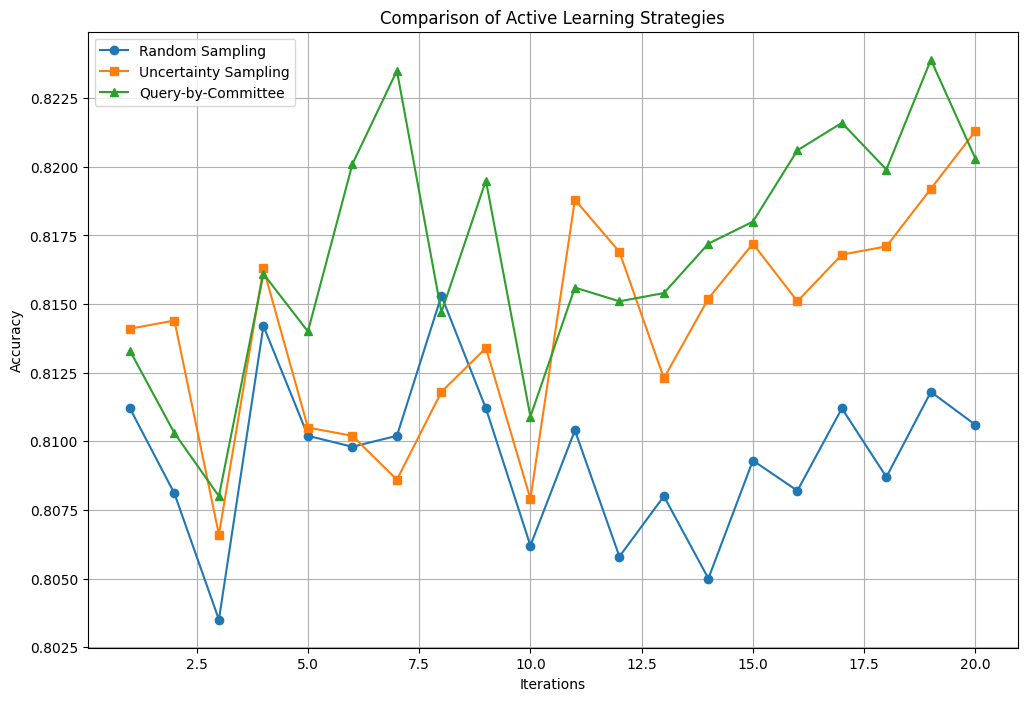

In [ ]:
#importing required libraries
import matplotlib.pyplot as plt

#1-to-20 iterations
iterations = list(range(1, 21))

#plot size
plt.figure(figsize=(12, 8))

#plotting accuracy for each stratergy
plt.plot(iterations, random_sampling_accuracies, label="Random Sampling", marker="o")
plt.plot(iterations, uncertainty_sampling_accuracies, label="Uncertainty Sampling", marker="s")
plt.plot(iterations, committee_sampling_accuracies, label="Query-by-Committee", marker="^")

#adding title
plt.title("Comparison of Active Learning Strategies")

#adding labels
plt.xlabel("Iterations")
plt.ylabel("Accuracy")

#adding legend
plt.legend(loc="upper left")

#adding grid
plt.grid(True)

Comparision of Final Model Accuracy across all 3 models

- Random Model Sampling model shows minimal improvement in accuracy over the iterations since the model randomly chooses the samples in active learning.

- Uncertainty Sampling model and Query-by-Committee model shows improvement in accuracy over the iterations, since it prioritizes more on the samples with high uncertainty and disagreement.

- In comparision to Uncertainty Sampling, Query-by-Committee model shows more accuracy since it pays attention to diverse perspectives on data, selecting the samples where models disagree. While, uncertainty sampling relies on uncertainty of a single model.

Comparision of Cost Effectiveness across all 3 models

- Out of all the three strategies QBC model is the most cost-effective model followed by Uncertainty Sampling Model. Random Sampling is the least cost-effective model.

- Random Sampling Model doesn't rely on any uncertainty or disagreement measure. Thus it may require large number of labeled data to notice any significant improvement in accuracy. This increases the cost in terms of time and resources.

- Uncertainty Sampling and QBC are much cost-effective since they focus on the most informative data. This leads to faster improvement in accuracy.

Findings

- QBC is the most cost-effective model with higher accuracy over 20 iteration. The reasons owing to its good performance have already been discussed in the previous sections.

- Uncertainty Sampling shows a performance intermediate between QBC and Random Sampling. It performs better than Random Sampling but less than QBC.

- Random Sampling Method showed almost neglible improvement in accuracy over the iterations. Primary reasons being : it doesn't have any specific criteria for choosing samples in active learning. Detailed discussion is covered in the previous sections.

Limitations

- Random Sampling Model is simple to implement but slightly inefficient since would potentially require more labeled data to attain high accuracy.

- Uncertainty Sampling can be computationally expensive and might sometimes lead to overfitting, since it focuses on the most uncertain samples. It also relies on a single model, thus it might miss out on nuances areas.

- QBC relies on multiple models which can be computationally expensive.